In [181]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import svm

In [183]:
diabetes_dataset = pd.read_csv(r"C:\Users\Moynuddin\OneDrive\Desktop\Jupyter Projects\diabetes_dataset.csv")
diabetes_dataset.head(10)

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0
5,41,10,17.47,67.0,71,4.2,105.3,58.8,140.7,81.8,93.2,0.88,1,0,0,0,1
6,20,16,15.76,61.6,60,4.0,62.4,43.4,64.6,66.5,102.7,0.65,0,1,0,0,0
7,39,4,28.11,105.0,94,4.5,91.0,50.1,195.5,123.2,121.4,1.01,1,0,0,0,1
8,70,3,24.32,83.8,90,4.0,144.1,51.3,156.5,79.3,105.4,0.75,0,1,0,1,0
9,19,1,16.63,66.5,62,4.0,98.9,64.3,91.1,70.8,93.1,0.76,1,0,0,0,1


In [185]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 9538 non-null   int64  
 1   Pregnancies         9538 non-null   int64  
 2   BMI                 9538 non-null   float64
 3   Glucose             9538 non-null   float64
 4   BloodPressure       9538 non-null   int64  
 5   HbA1c               9538 non-null   float64
 6   LDL                 9538 non-null   float64
 7   HDL                 9538 non-null   float64
 8   Triglycerides       9538 non-null   float64
 9   WaistCircumference  9538 non-null   float64
 10  HipCircumference    9538 non-null   float64
 11  WHR                 9538 non-null   float64
 12  FamilyHistory       9538 non-null   int64  
 13  DietType            9538 non-null   int64  
 14  Hypertension        9538 non-null   int64  
 15  MedicationUse       9538 non-null   int64  
 16  Outcom

In [187]:
diabetes_dataset.isnull().sum()

Age                   0
Pregnancies           0
BMI                   0
Glucose               0
BloodPressure         0
HbA1c                 0
LDL                   0
HDL                   0
Triglycerides         0
WaistCircumference    0
HipCircumference      0
WHR                   0
FamilyHistory         0
DietType              0
Hypertension          0
MedicationUse         0
Outcome               0
dtype: int64

In [189]:
diabetes_dataset.describe()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
count,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000
mean,53.577584,7.986161,27.052364,106.104183,84.475781,4.650661,100.133456,49.953418,151.147746,93.951678,103.060621,0.917400,0.302474,0.486161,0.001048,0.405012,0.344097
std,20.764651,4.933469,5.927955,21.918590,14.123480,0.476395,29.911910,15.242194,48.951627,15.594468,13.438827,0.140828,0.459354,0.661139,0.032364,0.490920,0.475098
min,18.000000,0.000000,15.000000,50.000000,60.000000,4.000000,-12.000000,-9.200000,50.000000,40.300000,54.800000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,4.000000,22.870000,91.000000,74.000000,4.300000,80.100000,39.700000,117.200000,83.400000,94.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,8.000000,27.050000,106.000000,84.000000,4.600000,99.900000,50.200000,150.550000,93.800000,103.200000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,72.000000,12.000000,31.180000,121.000000,94.000000,5.000000,120.200000,60.200000,185.100000,104.600000,112.100000,1.010000,1.000000,1.000000,0.000000,1.000000,1.000000
max,89.000000,16.000000,49.660000,207.200000,138.000000,6.900000,202.200000,107.800000,345.800000,163.000000,156.600000,1.490000,1.000000,2.000000,1.000000,1.000000,1.000000


In [191]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    6256
1    3282
Name: count, dtype: int64

In [193]:
dataset_correlation = diabetes_dataset.corr()

<Axes: >

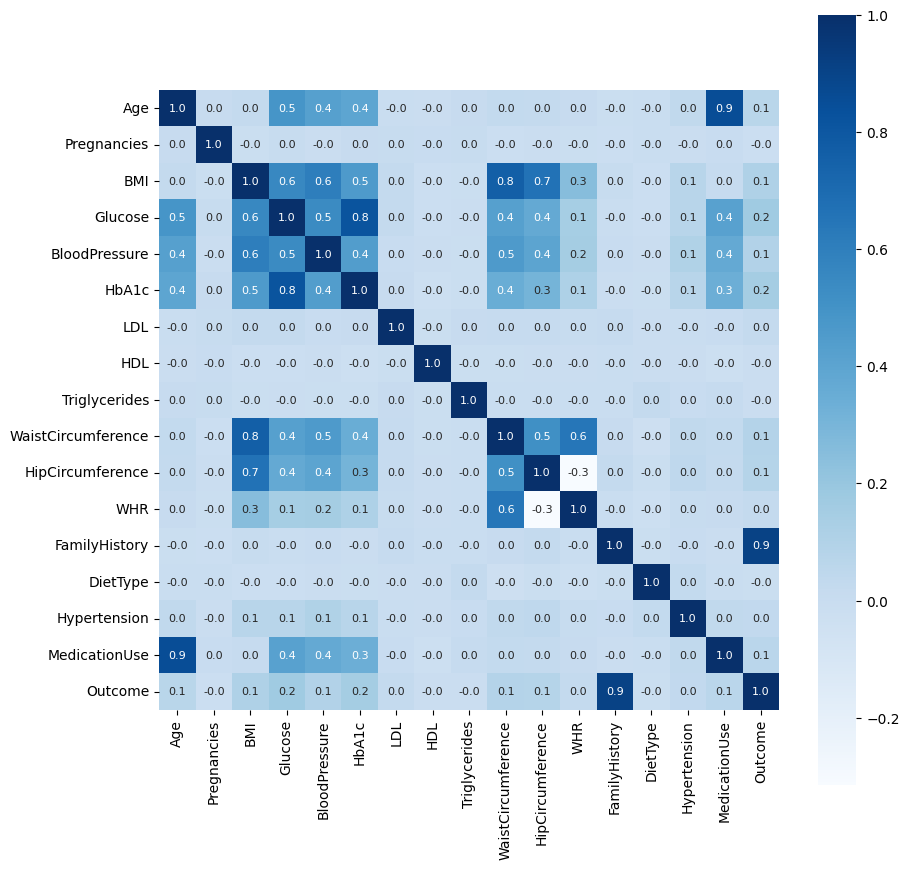

In [195]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset_correlation,cbar=True,square=True ,fmt='.1f',annot=True, annot_kws={'size':8},cmap='Blues')


In [197]:
diabetes_dataset.columns

Index(['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LDL',
       'HDL', 'Triglycerides', 'WaistCircumference', 'HipCircumference', 'WHR',
       'FamilyHistory', 'DietType', 'Hypertension', 'MedicationUse',
       'Outcome'],
      dtype='object')

In [199]:
Q1 = diabetes_dataset['BMI'].quantile(0.25)
Q3 = diabetes_dataset['BMI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get the minimum BMI value
min_bmi = diabetes_dataset['BMI'].min()

# Replace outliers in the BMI column with the minimum value
diabetes_dataset.loc[(diabetes_dataset['BMI'] < lower_bound) | (diabetes_dataset['BMI'] > upper_bound), 'BMI'] = min_bmi

print("Outliers in BMI column replaced with the minimum value.")



Outliers in BMI column replaced with the minimum value.


In [201]:
diabetes_dataset.describe()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
count,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000
mean,53.577584,7.986161,26.953732,106.104183,84.475781,4.650661,100.133456,49.953418,151.147746,93.951678,103.060621,0.917400,0.302474,0.486161,0.001048,0.405012,0.344097
std,20.764651,4.933469,5.874261,21.918590,14.123480,0.476395,29.911910,15.242194,48.951627,15.594468,13.438827,0.140828,0.459354,0.661139,0.032364,0.490920,0.475098
min,18.000000,0.000000,15.000000,50.000000,60.000000,4.000000,-12.000000,-9.200000,50.000000,40.300000,54.800000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,4.000000,22.830000,91.000000,74.000000,4.300000,80.100000,39.700000,117.200000,83.400000,94.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,8.000000,27.000000,106.000000,84.000000,4.600000,99.900000,50.200000,150.550000,93.800000,103.200000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,72.000000,12.000000,31.110000,121.000000,94.000000,5.000000,120.200000,60.200000,185.100000,104.600000,112.100000,1.010000,1.000000,1.000000,0.000000,1.000000,1.000000
max,89.000000,16.000000,43.460000,207.200000,138.000000,6.900000,202.200000,107.800000,345.800000,163.000000,156.600000,1.490000,1.000000,2.000000,1.000000,1.000000,1.000000


In [203]:
x = diabetes_dataset.iloc[:, :-1]
y = diabetes_dataset['Outcome']

In [205]:
print(x.shape[1])  # This will print the number of features in your dataset


16


In [209]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [211]:
standard_data = scaler.transform(x)

In [213]:
x = standard_data
y = diabetes_dataset['Outcome']

In [215]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)

In [217]:
print(x.shape, x_train.shape, x_test.shape)

(9538, 16) (7630, 16) (1908, 16)


In [219]:
model_classifier = svm.SVC(kernel='linear')
model_classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [232]:
train_prediction = model_classifier.predict(x_train)
train_accuracy = accuracy_score(train_prediction , y_train)
print(train_accuracy*100)

99.73787680209698


In [235]:
test_prediction = model_classifier.predict(x_test)
test_accuracy = accuracy_score(test_prediction, y_test)
print(test_accuracy*100)

99.73794549266248


In [239]:
model_classifier = svm.SVC(kernel='linear')
model_classifier.fit(x, y)  # Train the model


SVC(kernel='linear')

In [241]:
# ✅ Save the trained model and scaler using pickle
import pickle

# Save the trained SVM model
with open("diabetes_model.pkl", "wb") as f:
    pickle.dump(model_classifier, f)

# Save the fitted StandardScaler
with open("diabetes_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [249]:
import numpy as np

# Example input data with 16 features, corresponding to your dataset columns
input_data = [45, 2, 25.6, 120, 80, 6.5, 100, 50, 150, 85, 95, 0.8, 1, 1, 0, 0]  # Replace with actual values

# Convert input to NumPy array and reshape
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

# Scale the input
std_data = scaler.transform(input_data_reshape)

# Predict
prediction = model_classifier.predict(std_data)
print("Prediction:", prediction)

if prediction[0] == 0:
    print("No Diabetic")
else:
    print("Diabetic")


Prediction: [1]
Diabetic


C:\Users\Moynuddin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
